In [40]:
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("cleaned_df_all_legs.csv")
display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid lightgray">
    {df.to_html(index=True)}
</div>
"""))

,Leg,Round,Right Fencer,Left Fencer,Right Score,Left Score,MOV,Outcome,Scaled Outcome
0,1,pool1,MENDOZA JENNINA,ONG JICKLE CLAIN,5,2,3,1,0.800000
1,1,pool1,JIMENEZ JULIANNA,VELASCO ZOEY NICOLE,5,1,4,1,0.900000
2,1,pool1,RAFAEL RANA IMOGEN,LARRAZABAL ALEXA,2,5,-3,0,0.200000
3,1,pool1,VELASCO ZOEY NICOLE,MENDOZA JENNINA,2,5,-3,0,0.200000
4,1,pool1,ONG JICKLE CLAIN,RAFAEL RANA IMOGEN,5,4,1,1,0.600000
5,1,pool1,LARRAZABAL ALEXA,JIMENEZ JULIANNA,5,1,4,1,0.900000
6,1,pool1,MENDOZA JENNINA,RAFAEL RANA IMOGEN,5,4,1,1,0.600000
7,1,pool1,VELASCO ZOEY NICOLE,LARRAZABAL ALEXA,0,5,-5,0,0.000000
8,1,pool1,JIMENEZ JULIANNA,ONG JICKLE CLAIN,3,5,-2,0,0.300000
9,1,pool1,LARRAZABAL ALEXA,MENDOZA JENNINA,5,0,5,1,1.000000


In [88]:
# List of all Fencers who participated in the five legs
all_fencers = pd.unique(df[['Right Fencer','Left Fencer']].values.ravel())
fencers_df = pd.DataFrame(all_fencers, columns=['Fencer'])
fencers_df.index = fencers_df.index + 1

display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid lightgray">
    {fencers_df.to_html(index=True)}
</div>
"""))


,Fencer
1,MENDOZA JENNINA
2,ONG JICKLE CLAIN
3,JIMENEZ JULIANNA
4,VELASCO ZOEY NICOLE
5,RAFAEL RANA IMOGEN
6,LARRAZABAL ALEXA
7,ALPUERTO PARIS
8,SCHOFIELD CYRYLLE ANNE
9,ABELLA HANNIEL
10,TAPALES ENDIRAJ MARGARET


In [90]:
# Identify Pool and DE rows
df['is_pool'] = df['Round'].str.contains('pool', case=False)
df['is_de'] = ~df['Round'].str.contains('pool', case=False)

# Group by Leg and count
leg_counts = df.groupby('Leg').agg(
    Pool_Matches_Count = ('is_pool', 'sum'),
    DE_Matches_Count   = ('is_de', 'sum'),
    Total_Matches      = ('Round', 'size')  # optional total
).reset_index()

print(leg_counts)


   Leg  Pool_Matches_Count  DE_Matches_Count  Total_Matches
0    1                  95                31            126
1    2                 123                35            158
2    3                  90                31            121
3    4                 102                30            132
4    5                  81                24            105


In [98]:
# Make MOV absolute value
df['ABS_MOV'] = df['MOV'].abs()

# Separate Pool + DE data
df_pool = df[df['is_pool']]
df_de   = df[~df['is_pool']]



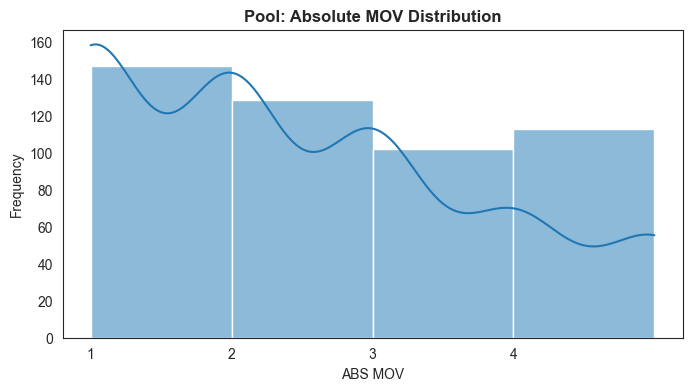

In [105]:
plt.figure(figsize=(8,4))
sns.histplot(df_pool['ABS_MOV'], bins=4, kde=True)

plt.title("Pool: Absolute MOV Distribution", weight="bold")
plt.xlabel("ABS MOV")
plt.ylabel("Frequency")

# Force ticks to integers
plt.xticks([1, 2, 3, 4])

plt.show()


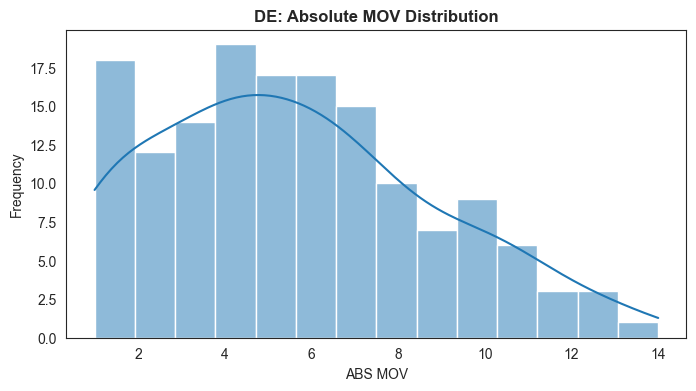

In [104]:
plt.figure(figsize=(8,4))
sns.histplot(df_de['ABS_MOV'], bins=14, kde=True)
plt.title("DE: Absolute MOV Distribution", weight="bold")
plt.xlabel("ABS MOV")
plt.ylabel("Frequency")
plt.show()


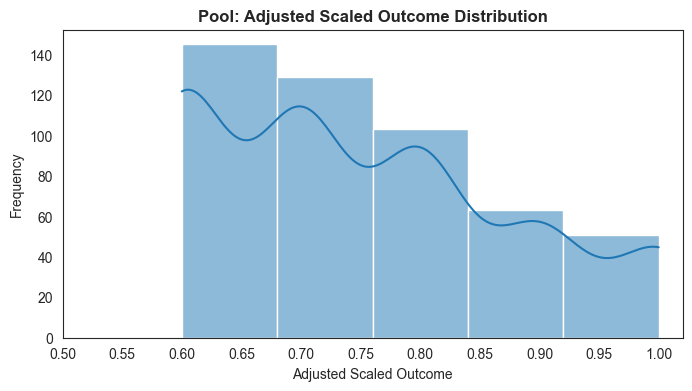

In [128]:
scaled_adj_pool = np.where(df_pool['Scaled Outcome'] < 0.5, 
                      1 - df_pool['Scaled Outcome'], 
                      df_pool['Scaled Outcome'])

# Plot
plt.figure(figsize=(8,4))
sns.histplot(scaled_adj_pool, bins=5, kde=True)

plt.title("Pool: Adjusted Scaled Outcome Distribution", weight="bold")
plt.xlabel("Adjusted Scaled Outcome")
plt.ylabel("Frequency")
plt.xticks([0.5,0.55,0.6, 0.65, 0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.show()

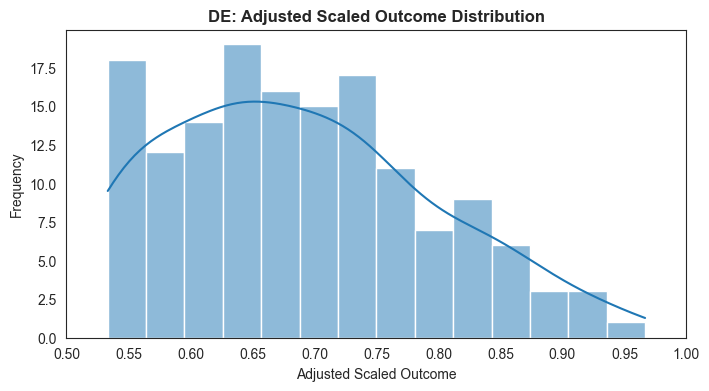

In [127]:
scaled_adj_de = np.where(df_de['Scaled Outcome'] < 0.5, 
                      1 - df_de['Scaled Outcome'], 
                      df_de['Scaled Outcome'])

# Plot
plt.figure(figsize=(8,4))
sns.histplot(scaled_adj_de, bins=14, kde=True)

plt.title("DE: Adjusted Scaled Outcome Distribution", weight="bold")
plt.xlabel("Adjusted Scaled Outcome")
plt.ylabel("Frequency")
plt.xticks([0.5,0.55,0.6, 0.65, 0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.show()


